In [64]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

from src import *

In [6]:
predicted_return_icir12 = pd.read_pickle('data/pred_ret_icir12.pkl')
predicted_return_icir12

predicted_ret
           ticker               
2007-06-30 A           -0.005025
           AAL         -0.062161
           AAPL         0.007671
           ABT         -0.039078
           ADBE        -0.029885
...                          ...
2024-02-29 XYL          0.033457
           YUM          0.021268
           ZBH          0.023318
           ZBRA         0.037367
           ZTS          0.037108

[63424 rows x 1 columns]

In [7]:
predicted_return_Lasso = pd.read_pickle('data/pred_ret_Lasso.pkl')
predicted_return_Lasso

predicted_ret
           ticker               
2000-02-29 A            0.158166
           AAPL         0.043293
           ABT         -0.047857
           ADBE         0.166291
           ADI          0.120586
...                          ...
2024-02-29 XYL          0.081188
           YUM          0.010502
           ZBH          0.038123
           ZBRA         0.033297
           ZTS          0.023815

[98303 rows x 1 columns]

In [9]:
predicted_return_least_corr = pd.read_pickle(r'data/pred_ret_Least Correlated 15.pkl')
predicted_return_least_corr

predicted_ret
           ticker               
2001-02-28 A           -0.089789
           AAPL        -0.074102
           ABT         -0.033381
           ADBE        -0.056268
           ADI          0.014105
...                          ...
2024-02-29 XYL          0.077408
           YUM          0.000280
           ZBH          0.036020
           ZBRA         0.035131
           ZTS          0.011332

[80783 rows x 1 columns]

In [32]:
predicted_return_arima = pd.read_pickle('data/pred_ret_arima.pkl')
predicted_return_arima.rename_axis(index=[None,'ticker'],inplace=True)
predicted_return_arima

predicted_ret
           ticker              
2007-06-30 A           -0.01238
           AAL           0.0036
           AAPL        0.002501
           ABT        -0.026493
           ADBE       -0.023899
...                         ...
2024-02-29 XYL         0.012432
           YUM        -0.003622
           ZBH        -0.005221
           ZBRA       -0.020486
           ZTS         0.006701

[72398 rows x 1 columns]

In [38]:
ratio = pd.read_pickle('data/ratio_68.pkl')
ratio.rename_axis(index=[None,'ticker'],inplace=True)
ratio

curr_ratio  free_cash_flow_per_share  ret_equity  \
           ticker                                                     
2000-01-31 A              NaN                       NaN         NaN   
           AAPL           NaN                       NaN         NaN   
           ABT            NaN                       NaN         NaN   
           ADBE           NaN                       NaN         NaN   
           ADI            NaN                       NaN         NaN   
...                       ...                       ...         ...   
2024-02-29 XYL         1.7222                    0.8547    1.233796   
           YUM         1.2600                    4.6246   -5.589829   
           ZBH         1.6132                    4.6676    3.236602   
           ZBRA        1.0463                   -1.7598    0.554926   
           ZTS         3.3579                    3.5153   10.369553   

                   gross_margin  ret_asset  tot_debt_tot_equity  \
           ticker                                                 
2000-01-31 A                NaN        NaN                  NaN   
           AAPL             NaN        NaN                  NaN   
           ABT              NaN        NaN                  NaN   
           ADBE             NaN        NaN                  NaN   
           ADI              NaN        NaN                  NaN   
...                         ...        ...                  ...   
2024-02-29 XYL          36.8015   0.458395             0.184222   
           YUM          73.7230   0.878650            -1.351611   
           ZBH          72.2217   1.185020             0.444830   
           ZBRA         44.4004   0.092227             0.724704   
           ZTS          67.1035   0.518507             1.302070   

                   oper_profit_margin  invty_turn  ret_invst  \
           ticker                                              
2000-01-31 A                      NaN         NaN        NaN   
           AAPL                   NaN         NaN        NaN   
           ABT                    NaN         NaN        NaN   
           ADBE                   NaN         NaN        NaN   
           ADI                    NaN         NaN        NaN   
...                               ...         ...        ...   
2024-02-29 XYL                 9.2004      1.2148   1.024250   
           YUM                29.9116     47.8000  13.537415   
           ZBH                18.2474      0.2259   2.342744   
           ZBRA                7.3340      0.6978   0.331804   
           ZTS                29.3719      0.2839   4.482128   

                   pretax_profit_margin  ...   ret_0_1   ret_1_6  ret_6_12  \
           ticker                        ...                                 
2000-01-31 A                        NaN  ...       NaN       NaN       NaN   
           AAPL                     NaN  ...       NaN       NaN       NaN   
           ABT                      NaN  ...       NaN       NaN       NaN   
           ADBE                     NaN  ...       NaN       NaN       NaN   
           ADI                      NaN  ...       NaN       NaN       NaN   
...                                 ...  ...       ...       ...       ...   
2024-02-29 XYL                   8.9114  ... -0.110202 -0.120878  0.023306   
           YUM                  22.7898  ... -0.056831 -0.011927 -0.019248   
           ZBH                  14.6650  ... -0.042009 -0.049816  0.056825   
           ZBRA                  0.1982  ... -0.083603  0.054795  0.113616   
           ZTS                  29.3719  ... -0.036390 -0.039319 -0.094372   

                       skew  volume_shock  rs_volatility  p_volatility  \
           ticker                                                        
2000-01-31 A            NaN      0.604983       0.023066      0.021375   
           AAPL         NaN      0.897883       0.036539      0.033523   
           ABT          NaN      1.008005       0.008837      0.007463   
     

In [74]:
# merge all the predicted return from different factor seletion methods
pred_ret = predicted_return_icir12.copy()
pred_ret.columns = ['pred_ret_icir12']
pred_ret = pd.merge(pred_ret,predicted_return_Lasso,how='left',left_index=True,right_index=True)
pred_ret.rename(columns={'predicted_ret':'pred_ret_lasso'}, inplace=True)
pred_ret = pd.merge(pred_ret,predicted_return_least_corr,how='left',left_index=True,right_index=True)
pred_ret.rename(columns={'predicted_ret':'pred_ret_least_corr'}, inplace=True)
pred_ret = pd.merge(pred_ret,predicted_return_arima,how='left',left_index=True,right_index=True)
pred_ret.rename(columns={'predicted_ret':'pred_ret_arima'}, inplace=True)

pred_ret = pd.merge(pred_ret,ratio[['forward_ret']],how='left',left_index=True,right_index=True)
pred_ret

pred_ret_icir12  pred_ret_lasso  pred_ret_least_corr  \
           ticker                                                         
2007-06-30 A             -0.005025       -0.014584            -0.019592   
           AAL           -0.062161       -0.158683             0.008357   
           AAPL           0.007671        0.040797             0.035756   
           ABT           -0.039078       -0.036685            -0.027090   
           ADBE          -0.029885       -0.022952                  NaN   
...                            ...             ...                  ...   
2024-02-29 XYL            0.033457        0.081188             0.077408   
           YUM            0.021268        0.010502             0.000280   
           ZBH            0.023318        0.038123             0.036020   
           ZBRA           0.037367        0.033297             0.035131   
           ZTS            0.037108        0.023815             0.011332   

                  pred_ret_arima  forward_ret  
           ticker                              
2007-06-30 A            -0.01238    -0.001259  
           AAL            0.0036     0.122371  
           AAPL         0.002501     0.152267  
           ABT         -0.026493    -0.043217  
           ADBE        -0.023899     0.016304  
...                          ...          ...  
2024-02-29 XYL          0.012432     0.110202  
           YUM         -0.003622     0.056831  
           ZBH         -0.005221     0.042009  
           ZBRA        -0.020486     0.083603  
           ZTS          0.006701     0.036390  

[63424 rows x 5 columns]

In [75]:
#fill the nan value with 0, split the predicted return data to train and test
pred_ret.fillna(0.0,inplace=True)
mask = pred_ret.index.get_level_values(None) < '2019'
train, test = pred_ret[mask], pred_ret[~mask]
train

pred_ret_icir12  pred_ret_lasso  pred_ret_least_corr  \
           ticker                                                         
2007-06-30 A             -0.005025       -0.014584            -0.019592   
           AAL           -0.062161       -0.158683             0.008357   
           AAPL           0.007671        0.040797             0.035756   
           ABT           -0.039078       -0.036685            -0.027090   
           ADBE          -0.029885       -0.022952             0.000000   
...                            ...             ...                  ...   
2018-12-31 XYL           -0.078184       -0.083499            -0.091593   
           YUM           -0.103097       -0.075625            -0.094406   
           ZBH           -0.069556       -0.068957            -0.099944   
           ZBRA          -0.091547       -0.090331            -0.093841   
           ZTS           -0.078926       -0.073347            -0.100579   

                  pred_ret_arima  forward_ret  
           ticker                              
2007-06-30 A            -0.01238    -0.001259  
           AAL            0.0036     0.122371  
           AAPL         0.002501     0.152267  
           ABT         -0.026493    -0.043217  
           ADBE        -0.023899     0.016304  
...                          ...          ...  
2018-12-31 XYL         -0.051041     0.076304  
           YUM         -0.043211     0.023767  
           ZBH          0.008761     0.046128  
           ZBRA         0.026664     0.099394  
           ZTS          0.007463     0.008378  

[42535 rows x 5 columns]

In [76]:
test

pred_ret_icir12  pred_ret_lasso  pred_ret_least_corr  \
           ticker                                                         
2019-01-31 A              0.092209        0.075871             0.079377   
           AAL            0.093938        0.118790             0.100762   
           AAPL           0.085029        0.068502             0.072854   
           ABBV           0.109837        0.081248             0.083688   
           ABT            0.063764        0.038519             0.086070   
...                            ...             ...                  ...   
2024-02-29 XYL            0.033457        0.081188             0.077408   
           YUM            0.021268        0.010502             0.000280   
           ZBH            0.023318        0.038123             0.036020   
           ZBRA           0.037367        0.033297             0.035131   
           ZTS            0.037108        0.023815             0.011332   

                  pred_ret_arima  forward_ret  
           ticker                              
2019-01-31 A            0.059232     0.059387  
           AAL          0.104525     0.003669  
           AAPL         0.095421     0.080580  
           ABBV         0.173361    -0.003117  
           ABT          0.057472     0.076425  
...                          ...          ...  
2024-02-29 XYL          0.012432     0.110202  
           YUM         -0.003622     0.056831  
           ZBH         -0.005221     0.042009  
           ZBRA        -0.020486     0.083603  
           ZTS          0.006701     0.036390  

[20889 rows x 5 columns]

In [ ]:
#linear regression model training, regression coefficient as the weight, and combine all the returns
model = LinearRegression()
train.dropna(inplace=True)
model.fit(train[['pred_ret_icir12',	'pred_ret_lasso', 'pred_ret_least_corr', 'pred_ret_arima']], train['forward_ret'])
combined_ret = model.coef_/(sum(model.coef_)) * test[['pred_ret_icir12',	'pred_ret_lasso', 'pred_ret_least_corr', 'pred_ret_arima']]
combined_ret['pred_ret'] = combined_ret['pred_ret_icir12'] + combined_ret['pred_ret_lasso'] + combined_ret['pred_ret_least_corr'] + combined_ret['pred_ret_arima']
combined_ret

# Backtest

In [78]:
from sklearn.preprocessing import scale

def single_stock_pred_ols(
        ratio: pd.DataFrame, 
        factor_chosen: dict[datetime, list[str]],
        min_ticker: int = 50,
) -> pd.DataFrame:
    """
    Prediction next period single stock return
    
    Parameters
    ----------
    ratio: pd.DataFrame
        Index: (date, ticker)
        column: ratios + forward return
    factor_chosen: dict[datetime, list[str]]
        date -> list of factor selected for the period
    min_ticker: int
        minimum number of ticker predicted to generate prediction,
        If too many ticker has missing on any of the selected factor 
        on certain date, we will not predict, i.e. change position on this date.
        
    Returns
    -------
    pd.DataFrame:
        Index: (date, ticker)
        Columns: "predicted_ret"
    """
    pred = {}
    for train_date, selected in factor_chosen.items():
        test_date = train_date + pd.offsets.MonthEnd(1)
        if any([x not in ratio.index.get_level_values("date").unique() 
                for x in [train_date, test_date]]):
            print(f"Not trained on {train_date}: No ratio data on train/test date")
            continue
        train_df = ratio.loc[train_date][
            selected + ["forward_ret"]].dropna(how="any")
        if len(train_df) < min_ticker:
            print(f"Not trained on {train_date}: Too many tickers have missing")
            continue
        X_train = scale(train_df[selected])
        y_train = train_df["forward_ret"]
        model = LinearRegression()
        model.fit(X_train, y_train)
        
        test_df = ratio.loc[test_date][selected].dropna(how="any")
        pred[test_date] = pd.Series(
            model.predict(scale(test_df)),
            index = test_df.index
        )
    return pd.DataFrame(pred).unstack().dropna().rename("predicted_ret").to_frame()

In [79]:
df_ff = get_ff_data()
df_ff.shape
price = pd.read_pickle("data/prices.pkl")["adj_close"].unstack("ticker")

price = fill_price_dates(price, droplevel=False).ffill()

In [88]:
from typing import Callable

def backtest_pipe(
    name: str,
    factor_chosen: dict[datetime, list[str]],
    ratio: pd.DataFrame = ratio,
    pred_func: Callable = single_stock_pred_ols, 
) -> pd.Series:
    """
    Combine single stock prediction, backtest position calculation, and 
    backtest PnL tracking in the same function for easy use.
    
    Parameters
    ----------
    name: str
        Describe how factor are selected
    factor_chosen: dict[datetime, list[str]]
        a dictionary of factor selected
    ratio: pd.DataFrame
        Index: (date, ticker)
        column: ratios + forward return
    pred_func: Callable
        single stock prediction function, default = OLS.

    Returns
    -------
    pd.Series: 
        backtest cumulative return results evaluation, e.g. sharpe...
        
    This function also draw plot of cumulative with given name.
    """
    # Equity return prediction
    # predicted_returns = pred_func(
    #     ratio=ratio, factor_chosen=factor_chosen)
    # predicted_returns.to_pickle('data/predicted_return_icir12.pkl')
    ### changed here
    predicted_returns = combined_ret[['pred_ret']]
    
    
    # Trading backtest
    INIT_CAPITAL = 2e7
    position = calc_position_by_rank(
        df_price=price, 
        df_ratio=predicted_returns.unstack("ticker"),
        rank_formula="-pred_ret", #predicted_ret
        lb=0,
        ub=0.1,
        interval=None,
        use_change=False,
        position_size=INIT_CAPITAL / 20
    )
    trade_cls = CalcTrade(
        df_price=price,
        init_cap=INIT_CAPITAL
    )
    summary_df = trade_cls.iter_dates(position=position)
    summary_df["total_ret"].rename(name).plot(figsize=(12,4), title="Entire Period Return")

    return pd.Series({
        **eval_return(summary_df["total_ret"], df_ff=df_ff, ann_factor=12),
        **ff_decomposition(summary_df["total_ret"], df_ff=df_ff, ann_factor=12)
    }, name=name)

return             0.019800
mean               0.000459
std                0.005037
skew              -0.302441
kurtosis           1.909093
sharpe            -0.109195
sharpe_mkt         0.375419
sortino           -0.147429
var               -0.024028
cvar              -0.037806
max_drawdown      -0.024979
downside_beta      0.236474
alpha              0.016087
beta_Mkt-RF        0.118138
beta_SMB           0.496619
beta_HML           0.260639
beta_RF          123.477826
Name: combined, dtype: float64

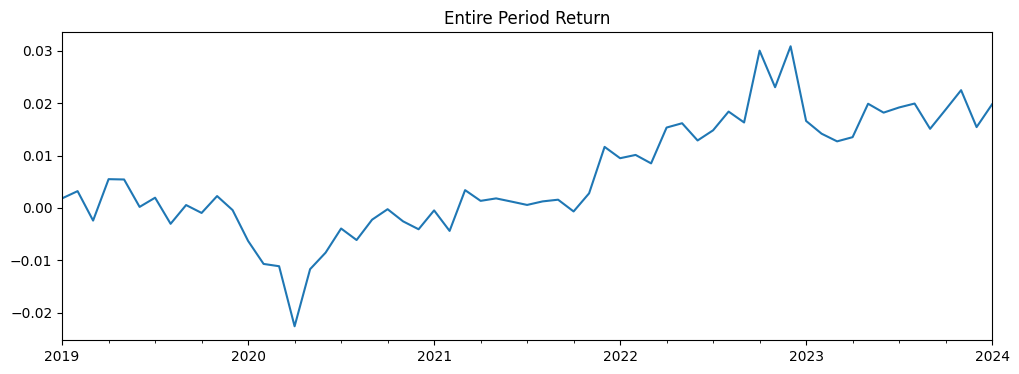

In [89]:
backtest_pipe('combined', None)